<a href="https://colab.research.google.com/github/shreyakurani/Shreya_HDS_5230_07/blob/main/Week_10_HDS__Batch_Model_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [247]:
#Here we import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

In [248]:
# Model Evaluation
def model_evaluation(y_test, y_pred):
    print('Trained Model Test Data Accuracy Score :', accuracy_score(y_test, y_pred) * 100)
    testacc = accuracy_score(y_test, y_pred)
    testrecall = recall_score(y_test, y_pred, average='macro')
    testprecision = precision_score(y_test, y_pred, average='macro')
    print('\nClassification Report:\n')
    print(classification_report(y_test, y_pred))
    return testacc, testrecall, testprecision

In [249]:
# Here we are generating a function to Print Results
def get_results(x1):
    print("\n{0:20}   {1:4}    {2:4}    {3:4}    {4:4}".format('Model','Train','Accuracy', 'Recall','Precision'))
    print('-------------------------------------------')
    for i in x1.keys():
        print("{0:20}   {1:<6.4}   {2:<6.4}    {3:<6.4}    {4:<6.4}".format(i,x1[i][0],x1[i][1],x1[i][2],x1[i][3]))

In [250]:
# Here we name the result score dictionary
result_scores = {}

In [251]:
def extract_X_Y(data) :
    X = data [["x", "y"]].values
    Y = data ["result"].values
    return X, Y

In [252]:
#read the first csv file
first_data = pd.read_csv("first.csv")
first_data

,Unnamed: 0,key,x,y,result
0,0,1,-0.515258,0.601255,False
1,1,1,0.442515,0.883295,True
2,2,1,-0.412906,0.154696,False
3,3,1,0.485963,-0.782856,False
4,4,1,0.223733,0.254806,True
...,...,...,...,...,...
995,995,1,-0.383606,-0.480100,True
996,996,1,0.381912,0.920676,True
997,997,1,0.795897,-0.085877,False
998,998,1,0.716176,0.240112,True


In [253]:
#Here we extract X& Y first data
X1, Y1 = extract_X_Y(first_data)
y1 = first_data["y"].round().astype(int)

In [254]:
#split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.40)

In [255]:
# Step 1: Dummy Classifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X1_train, y1_train)

y1_pred = dummy.predict(X1_test)
testacc, testrecall, testprecision = model_evaluation(y1_test, y1_pred)
trainacc = accuracy_score(y1_train, dummy.predict(X1_train))
result_scores['Dummy'] = (trainacc, testacc, testprecision, testrecall)

Trained Model Test Data Accuracy Score : 49.5

Classification Report:

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       110
           0       0.49      1.00      0.66       198
           1       0.00      0.00      0.00        92

    accuracy                           0.49       400
   macro avg       0.17      0.33      0.22       400
weighted avg       0.25      0.49      0.33       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [256]:
#now we analyse and evaluate the dummy score
print("Dummy Score:", dummy.score(X1_test, y1_test))

Dummy Score: 0.495


In [257]:
#Step 2:- KNN Training
second_data = pd.read_csv("second.csv")
second_data

,Unnamed: 0,key,x,y,result
0,0,1,-0.629670,-0.201984,True
1,1,1,-0.054524,0.148606,False
2,2,1,-0.101044,-0.215570,True
3,3,1,0.264544,-0.579622,False
4,4,1,0.944177,0.389696,True
...,...,...,...,...,...
995,995,1,0.970584,0.018392,True
996,996,1,-0.968570,-0.464665,True
997,997,1,0.194331,-0.314176,False
998,998,1,0.816535,0.359221,True


In [258]:
#here we extract X & Y second data
X2, Y2 = extract_X_Y(second_data)
y2 = second_data["y"].round().astype(int)

In [259]:
#split the second data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.40)

In [260]:
#now we train knn model
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X2_train, y2_train)

KNeighborsClassifier()

In [261]:
#now we would analyse & evaluate the data
y2_pred = knn_model.predict(X2_test)
testacc, testrecall, testprecision = model_evaluation(y2_test, y2_pred)

Trained Model Test Data Accuracy Score : 97.75

Classification Report:

              precision    recall  f1-score   support

          -1       0.98      0.99      0.98        89
           0       0.99      0.97      0.98       204
           1       0.95      0.99      0.97       107

    accuracy                           0.98       400
   macro avg       0.97      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [262]:
# Save results
trainacc = knn_model.score(X2_train, y2_train)
result_scores['KNN-Training'] = (trainacc, testacc, testprecision, testrecall)
# Print results so far
get_results(result_scores)


Model                  Train    Accuracy    Recall    Precision
-------------------------------------------
Dummy                  0.515    0.495     0.165     0.3333
KNN-Training           0.9833   0.9775    0.9742    0.9817


In [263]:
#Step 3 :- KNN Prediction
third_data = pd.read_csv("third.csv")
third_data

,Unnamed: 0,key,x,y,result
0,0,1,0.131849,-0.859172,False
1,1,1,-0.334795,0.811895,False
2,2,1,0.782900,0.406387,False
3,3,1,-0.494875,-0.377257,False
4,4,1,-0.627271,-0.506035,True
...,...,...,...,...,...
995,995,1,0.550657,0.322521,False
996,996,1,0.686101,0.807379,True
997,997,1,0.124554,0.061351,False
998,998,1,-0.451919,0.545019,False


In [264]:
#extract x & y from third data
X3, Y3 = extract_X_Y(third_data)
y3 = third_data["y"].round().astype(int)

In [265]:
#split the third data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.40)

In [266]:
#predict and evaluate with the existing knn model
y3_pred = knn_model.predict(X3_test)
testacc, testrecall, testprecision = model_evaluation(y3_test, y3_pred)

Trained Model Test Data Accuracy Score : 97.5

Classification Report:

              precision    recall  f1-score   support

          -1       0.99      0.96      0.98       111
           0       0.96      0.98      0.97       192
           1       0.98      0.97      0.97        97

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.98       400
weighted avg       0.98      0.97      0.98       400



In [267]:
#score the results and print the results so far
trainacc = knn_model.score(X3_train, y3_train)
result_scores['KNN-Prediction'] = (trainacc, testacc, testprecision, testrecall)
get_results(result_scores)


Model                  Train    Accuracy    Recall    Precision
-------------------------------------------
Dummy                  0.515    0.495     0.165     0.3333
KNN-Training           0.9833   0.9775    0.9742    0.9817
KNN-Prediction         0.98     0.975     0.9781    0.9725


In [268]:
fourth_data = pd.read_csv("fourth.csv")
fourth_data

,Unnamed: 0,key,x,y,result
0,0,1,-0.167995,-0.715184,False
1,1,1,0.650967,0.807528,True
2,2,1,0.046858,-0.264659,False
3,3,1,0.882458,-0.205609,False
4,4,1,-0.338443,-0.885061,True
...,...,...,...,...,...
995,995,1,0.902761,-0.487468,False
996,996,1,0.350615,0.028936,False
997,997,1,-0.955657,0.381122,False
998,998,1,-0.275499,-0.104344,False


In [269]:
##extract x & y from fourth data
X4, Y4 = extract_X_Y(fourth_data)
y4 = fourth_data["y"].round().astype(int)

In [270]:
#split the data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.40)

In [271]:
#Here we retrain the data wih the fourth data
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X4_train, y4_train)

KNeighborsClassifier()

In [272]:
#predict and evaluate with the existing knn model
y4_pred = knn_model.predict(X4_test)
testacc, testrecall, testprecision = model_evaluation(y4_test, y4_pred)

Trained Model Test Data Accuracy Score : 95.25

Classification Report:

              precision    recall  f1-score   support

          -1       0.95      0.97      0.96       115
           0       0.95      0.95      0.95       197
           1       0.96      0.93      0.95        88

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [273]:
#score the results and print the results so far
trainacc = knn_model.score(X4_train, y4_train)
result_scores['KNN-Retraining'] = (trainacc, testacc, testprecision, testrecall)
get_results(result_scores)


Model                  Train    Accuracy    Recall    Precision
-------------------------------------------
Dummy                  0.515    0.495     0.165     0.3333
KNN-Training           0.9833   0.9775    0.9742    0.9817
KNN-Prediction         0.98     0.975     0.9781    0.9725
KNN-Retraining         0.985    0.9525    0.9543    0.9505


In [274]:
# Step 5:- KNN Retrained Model

# Here we predict again using the retrained model
y4_pred_final = knn_model.predict(X4_test)
#evaluate the retrained model
testacc = knn_model.score(X4_test, y4_test)
#Recall & Precision – still from metrics
testrecall = recall_score(y4_test, y4_pred_final, average='macro')
testprecision = precision_score(y4_test, y4_pred_final, average='macro')

In [275]:
#store the prediction results
trainacc = knn_model.score(X4_train, y4_train)
result_scores['KNN-Retrained Prediction'] = (trainacc, testacc, testprecision, testrecall)

# Here we print final results table
get_results(result_scores)


Model                  Train    Accuracy    Recall    Precision
-------------------------------------------
Dummy                  0.515    0.495     0.165     0.3333
KNN-Training           0.9833   0.9775    0.9742    0.9817
KNN-Prediction         0.98     0.975     0.9781    0.9725
KNN-Retraining         0.985    0.9525    0.9543    0.9505
KNN-Retrained Prediction   0.985    0.9525    0.9543    0.9505


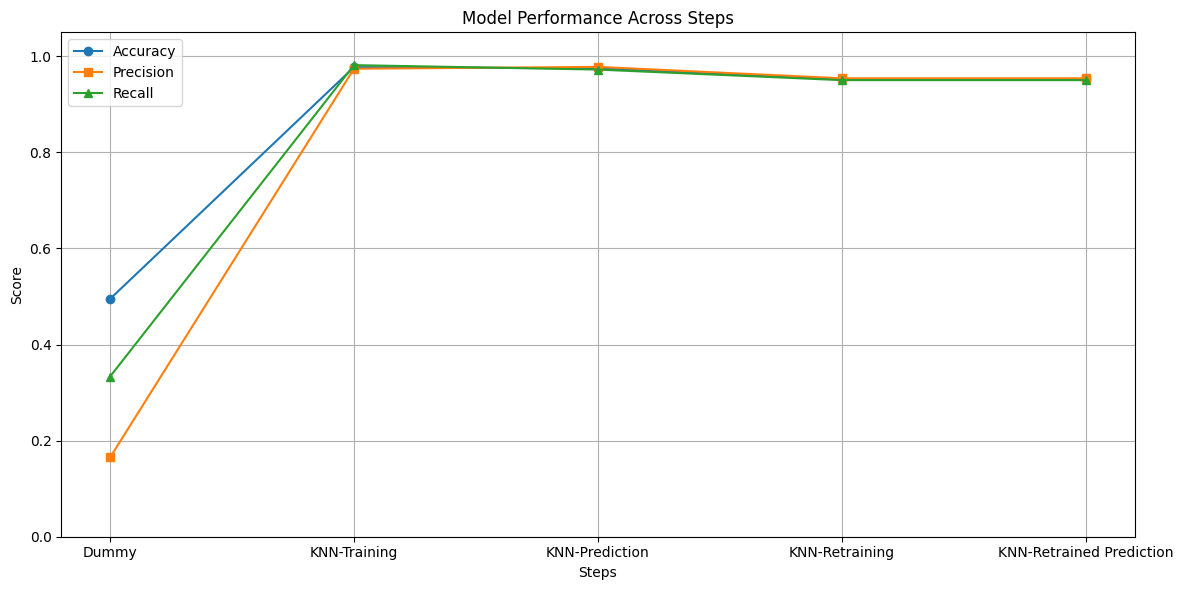

In [276]:
#Here we plot final graph
labels = ['Dummy', 'KNN-Training', 'KNN-Prediction', 'KNN-Retraining', 'KNN-Retrained Prediction']
accuracy_values = [result_scores[i][1] for i in labels]
precision_values = [result_scores[i][2] for i in labels]
recall_values = [result_scores[i][3] for i in labels]

plt.figure(figsize=(12, 6))
plt.plot(labels, accuracy_values, label="Accuracy", marker='o')
plt.plot(labels, precision_values, label="Precision", marker='s')
plt.plot(labels, recall_values, label="Recall", marker='^')
plt.title("Model Performance Across Steps")
plt.xlabel("Steps")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
